Import necessary libraries
---

In [1]:
import numpy as np
import xarray as xr
import pymannkendall as mk
from scipy import stats
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cf
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

Read datasets
---

In [2]:
data = xr.open_mfdataset(
    'CHIRPS/chirps-v2.*.nc', combine = 'by_coords').sel(
    longitude = slice(92,143), latitude = slice(-12, 7),
    time = slice('2012', '2021')).precip

shape_file = list(shapereader.Reader(str(('IDN_adm/IDN_adm0.shp'))).geometries())

monthly totals
---

In [3]:
mon_tot = data.resample(time = '1M').sum('time')
mon_tot

<xarray.DataArray 'precip' (time: 120, latitude: 76, longitude: 204)>
dask.array<stack, shape=(120, 76, 204), dtype=float32, chunksize=(1, 76, 204), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -11.88 -11.62 -11.38 ... 6.375 6.625 6.875
  * longitude  (longitude) float32 92.12 92.38 92.62 92.88 ... 142.4 142.6 142.9
  * time       (time) datetime64[ns] 2012-01-31 2012-02-29 ... 2021-12-31
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

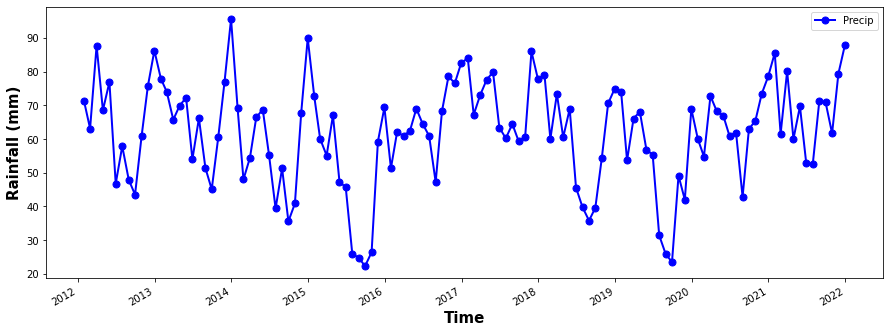

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

##plotting data
mon_tot.mean(['longitude', 'latitude']).plot(color = 'b', marker = 'o', markersize = 7, lw = 2, label = 'Precip')

#ax.set_title( 'Annual Rainfall Totals - Indonesia', fontsize = 15, fontweight = 'bold')
ax.set_xlabel('Time',  fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Rainfall (mm)',  fontsize = 15, fontweight = 'bold')
ax.legend()


plt.savefig('monthly_totals.jpg')

monthly climatology
---

In [5]:
mon_clim = mon_tot.groupby('time.month').mean('time')
mon_clim

<xarray.DataArray 'precip' (month: 12, latitude: 76, longitude: 204)>
dask.array<stack, shape=(12, 76, 204), dtype=float32, chunksize=(1, 76, 204), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -11.88 -11.62 -11.38 ... 6.375 6.625 6.875
  * longitude  (longitude) float32 92.12 92.38 92.62 92.88 ... 142.4 142.6 142.9
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

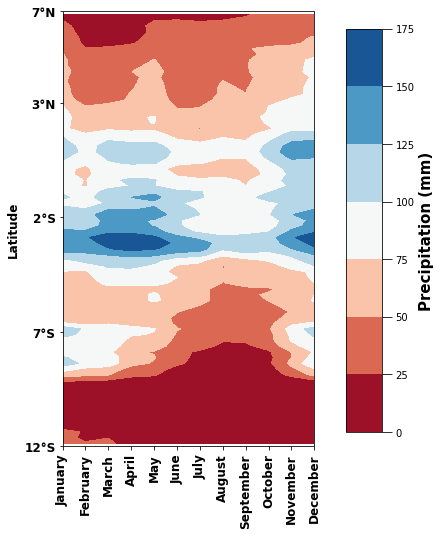

In [6]:
fig, axes = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(25,8))
#plt.subplots_adjust(right = 0.95)

month = ['January', 'February', 'March', 'April','May', 'June', 'July', 
                 'August', 'September', 'October','November', 'December']

ylabels = (['-12', '-7', '-2','3', '7'])
###############################################################
mm = mon_clim.mean('longitude').T
z = axes.contourf(mm['month'], mm['latitude'], mm,
                      transform=ccrs.PlateCarree(), cmap = 'RdBu')
#################################

axes.set_yticks([-12, -7, -2,3, 7], crs=ccrs.PlateCarree())
axes.set_xticks([1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

axes.set_xticklabels(month, rotation = 90, fontsize = 12, fontweight = 'bold')
axes.set_yticklabels(ylabels, fontsize = 12, fontweight = 'bold')

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
#axes.xaxis.set_major_formatter(lon_formatter)
axes.yaxis.set_major_formatter(lat_formatter)
      

#cbar_ax = fig.add_axes([0.16, 0.06, 0.6, 0.02])
cbar_ax = fig.add_axes([0.6, 0.15, 0.02, 0.7])
cbar=fig.colorbar(z, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(size=10)
#cbar2.set_ticks([])
cbar.set_label( label = 'Precipitation (mm)',size=15,weight='bold')

    
#axes.set_title('ZONAL DISTRIBUTION OF RAINFALL', fontweight = "bold", fontsize = 18)
axes.set_ylabel('Latitude',fontsize = 12, fontweight = 'bold' )

#plt.savefig('zonal_precip.pdf')
#plt.savefig('zonal_precip.png')
plt.savefig('zonal_precip.jpg')

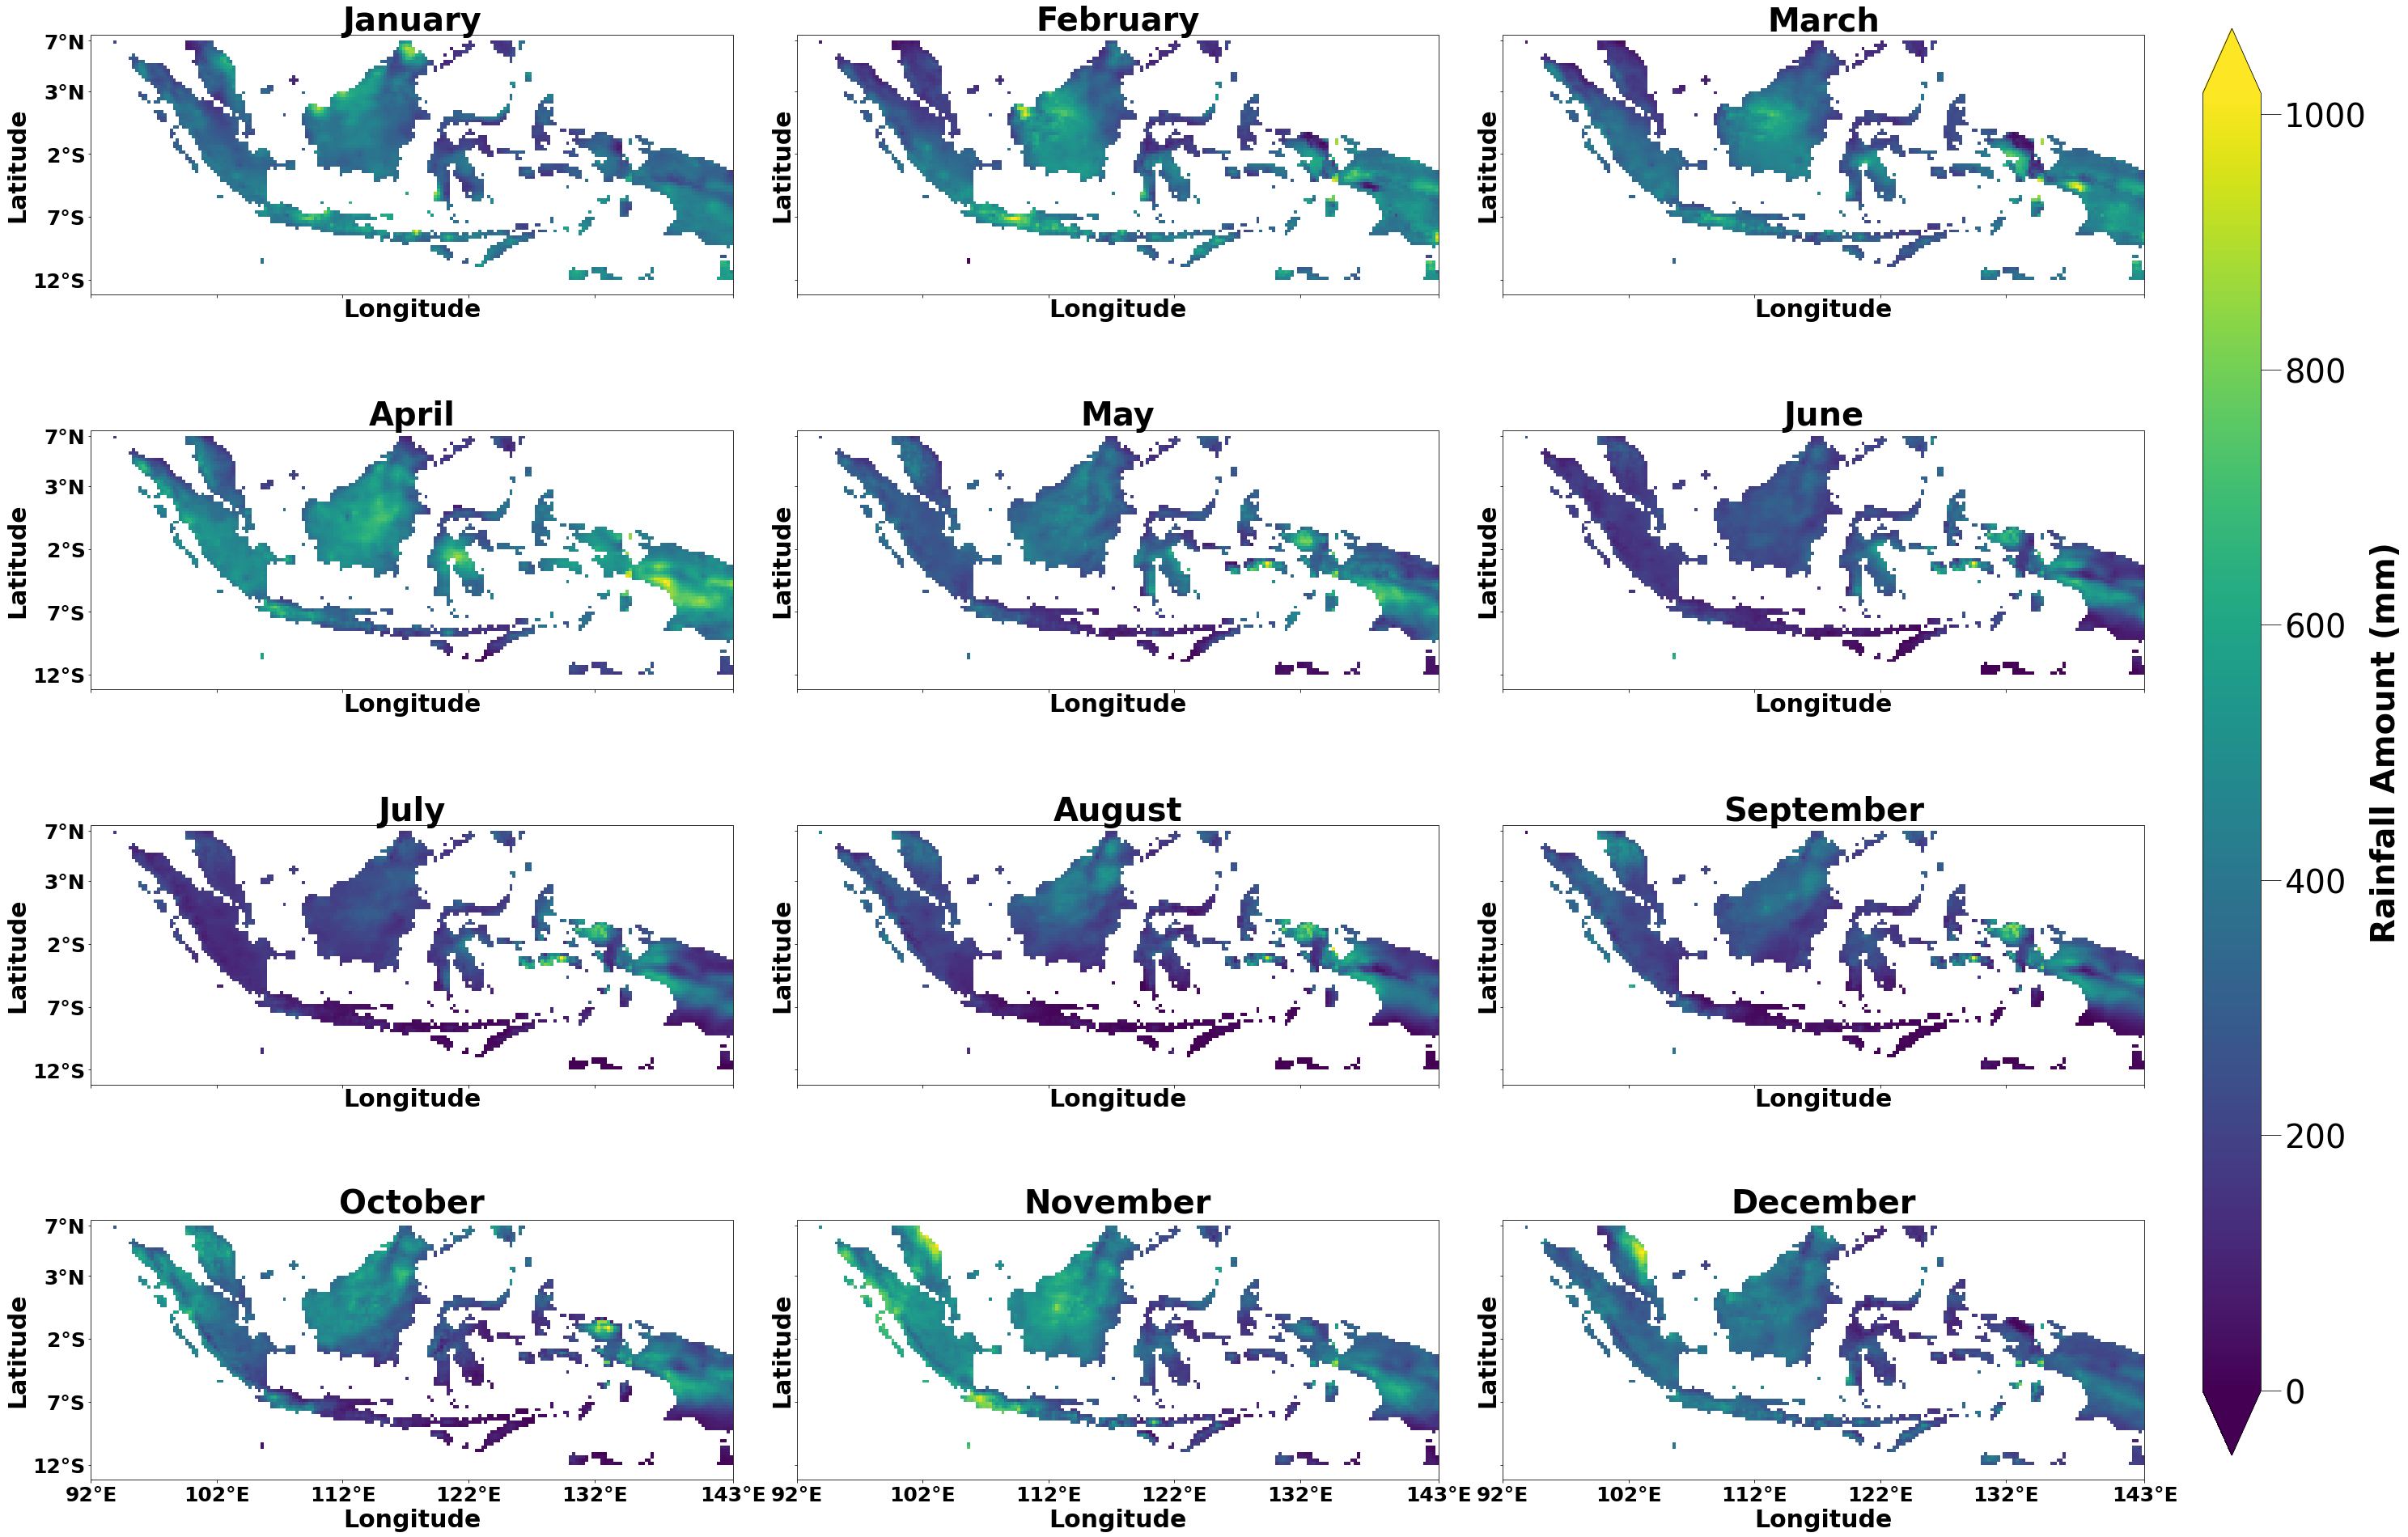

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw = dict(projection = ccrs.PlateCarree()), 
                         figsize=(50, 35), sharex = True, sharey = True)
plt.subplots_adjust(wspace= 0.1, top=0.9, right = 0.83, hspace = 0.0)#(bottom=0.25, right=0.95, top=0.9, hspace = 0.25)

ax = axes.flatten()

Titles = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
xlabels = (['92', '102', '112','122', '132', '143'])
ylabels = (['-12', '-7', '-2','3', '7'])

for i, a in enumerate(ax):
    ax[i].set_extent([92,143,7,-12])
    
    ax[i].set_xticks([92, 102, 112,122, 132, 143], crs=ccrs.PlateCarree()) 
    ax[i].set_yticks([-12, -7, -2,3, 7], crs=ccrs.PlateCarree())
    

    
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i].set_yticklabels(ylabels, fontsize = 25, fontweight = 'bold')
    ax[i].set_xticklabels(xlabels, fontsize = 25, fontweight = 'bold')
    ax[i].xaxis.set_major_formatter(lon_formatter)
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    mon_clim = mon_clim.where(mon_clim !=0)
    tp = mon_clim[i].plot(cmap='viridis', ax = ax[i], vmin = 0, add_colorbar = False)
    
    
    ax[i].set_title(Titles[i],  fontsize = 40, fontweight = 'bold')
    ax[i].set_xlabel('Longitude', fontsize = 30, fontweight = 'bold')
    ax[i].set_ylabel('Latitude', fontsize = 30, fontweight = 'bold')
    

cbar_ax = fig.add_axes([0.85, 0.17, 0.02, 0.7])
cbar=fig.colorbar(tp, cax=cbar_ax, orientation='vertical', extend = 'both')
cbar.set_label(label = 'Rainfall Amount (mm)',size=40, weight='bold')
cbar.ax.tick_params(size = 25, labelsize = 40)
#cbar2.set_ticks([])
plt.savefig('monthly_clim_spatial.jpg')

Annual totals
---

In [8]:
ann_clim = mon_tot.groupby('time.year').sum('time')#.mean(['longitude', 'latitude'])
ann_clim

<xarray.DataArray 'precip' (year: 10, latitude: 76, longitude: 204)>
dask.array<stack, shape=(10, 76, 204), dtype=float32, chunksize=(1, 76, 204), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -11.88 -11.62 -11.38 ... 6.375 6.625 6.875
  * longitude  (longitude) float32 92.12 92.38 92.62 92.88 ... 142.4 142.6 142.9
  * year       (year) int64 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [9]:
def trend(data):
    x = data.index
    y = data.precip.values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    return x, p(x)

ann_df = ann_clim.mean(['latitude', 'longitude']).to_dataframe()
slope = mk.original_test(ann_df).slope
a,b = trend(ann_df)
ann_df['trend'] = b


In [10]:
slope

2.961212158203125

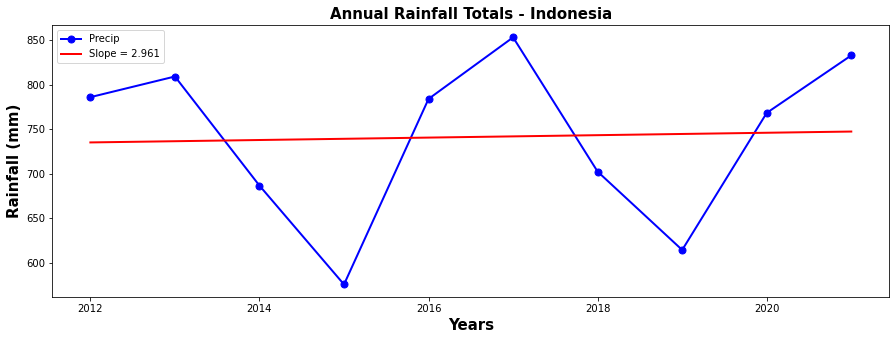

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

ann_clim.mean(['longitude', 'latitude']).plot(color = 'b', marker = 'o', markersize = 7, lw = 2, label = 'Precip')
ann_df.trend.plot(ax=ax, color = 'r', lw = 2, label = 'Slope = 2.961')
ax.set_title( 'Annual Rainfall Totals - Indonesia', fontsize = 15, fontweight = 'bold')
ax.set_xlabel('Years',  fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Rainfall (mm)',  fontsize = 15, fontweight = 'bold')
ax.legend()


plt.savefig('annual_clim.jpg')

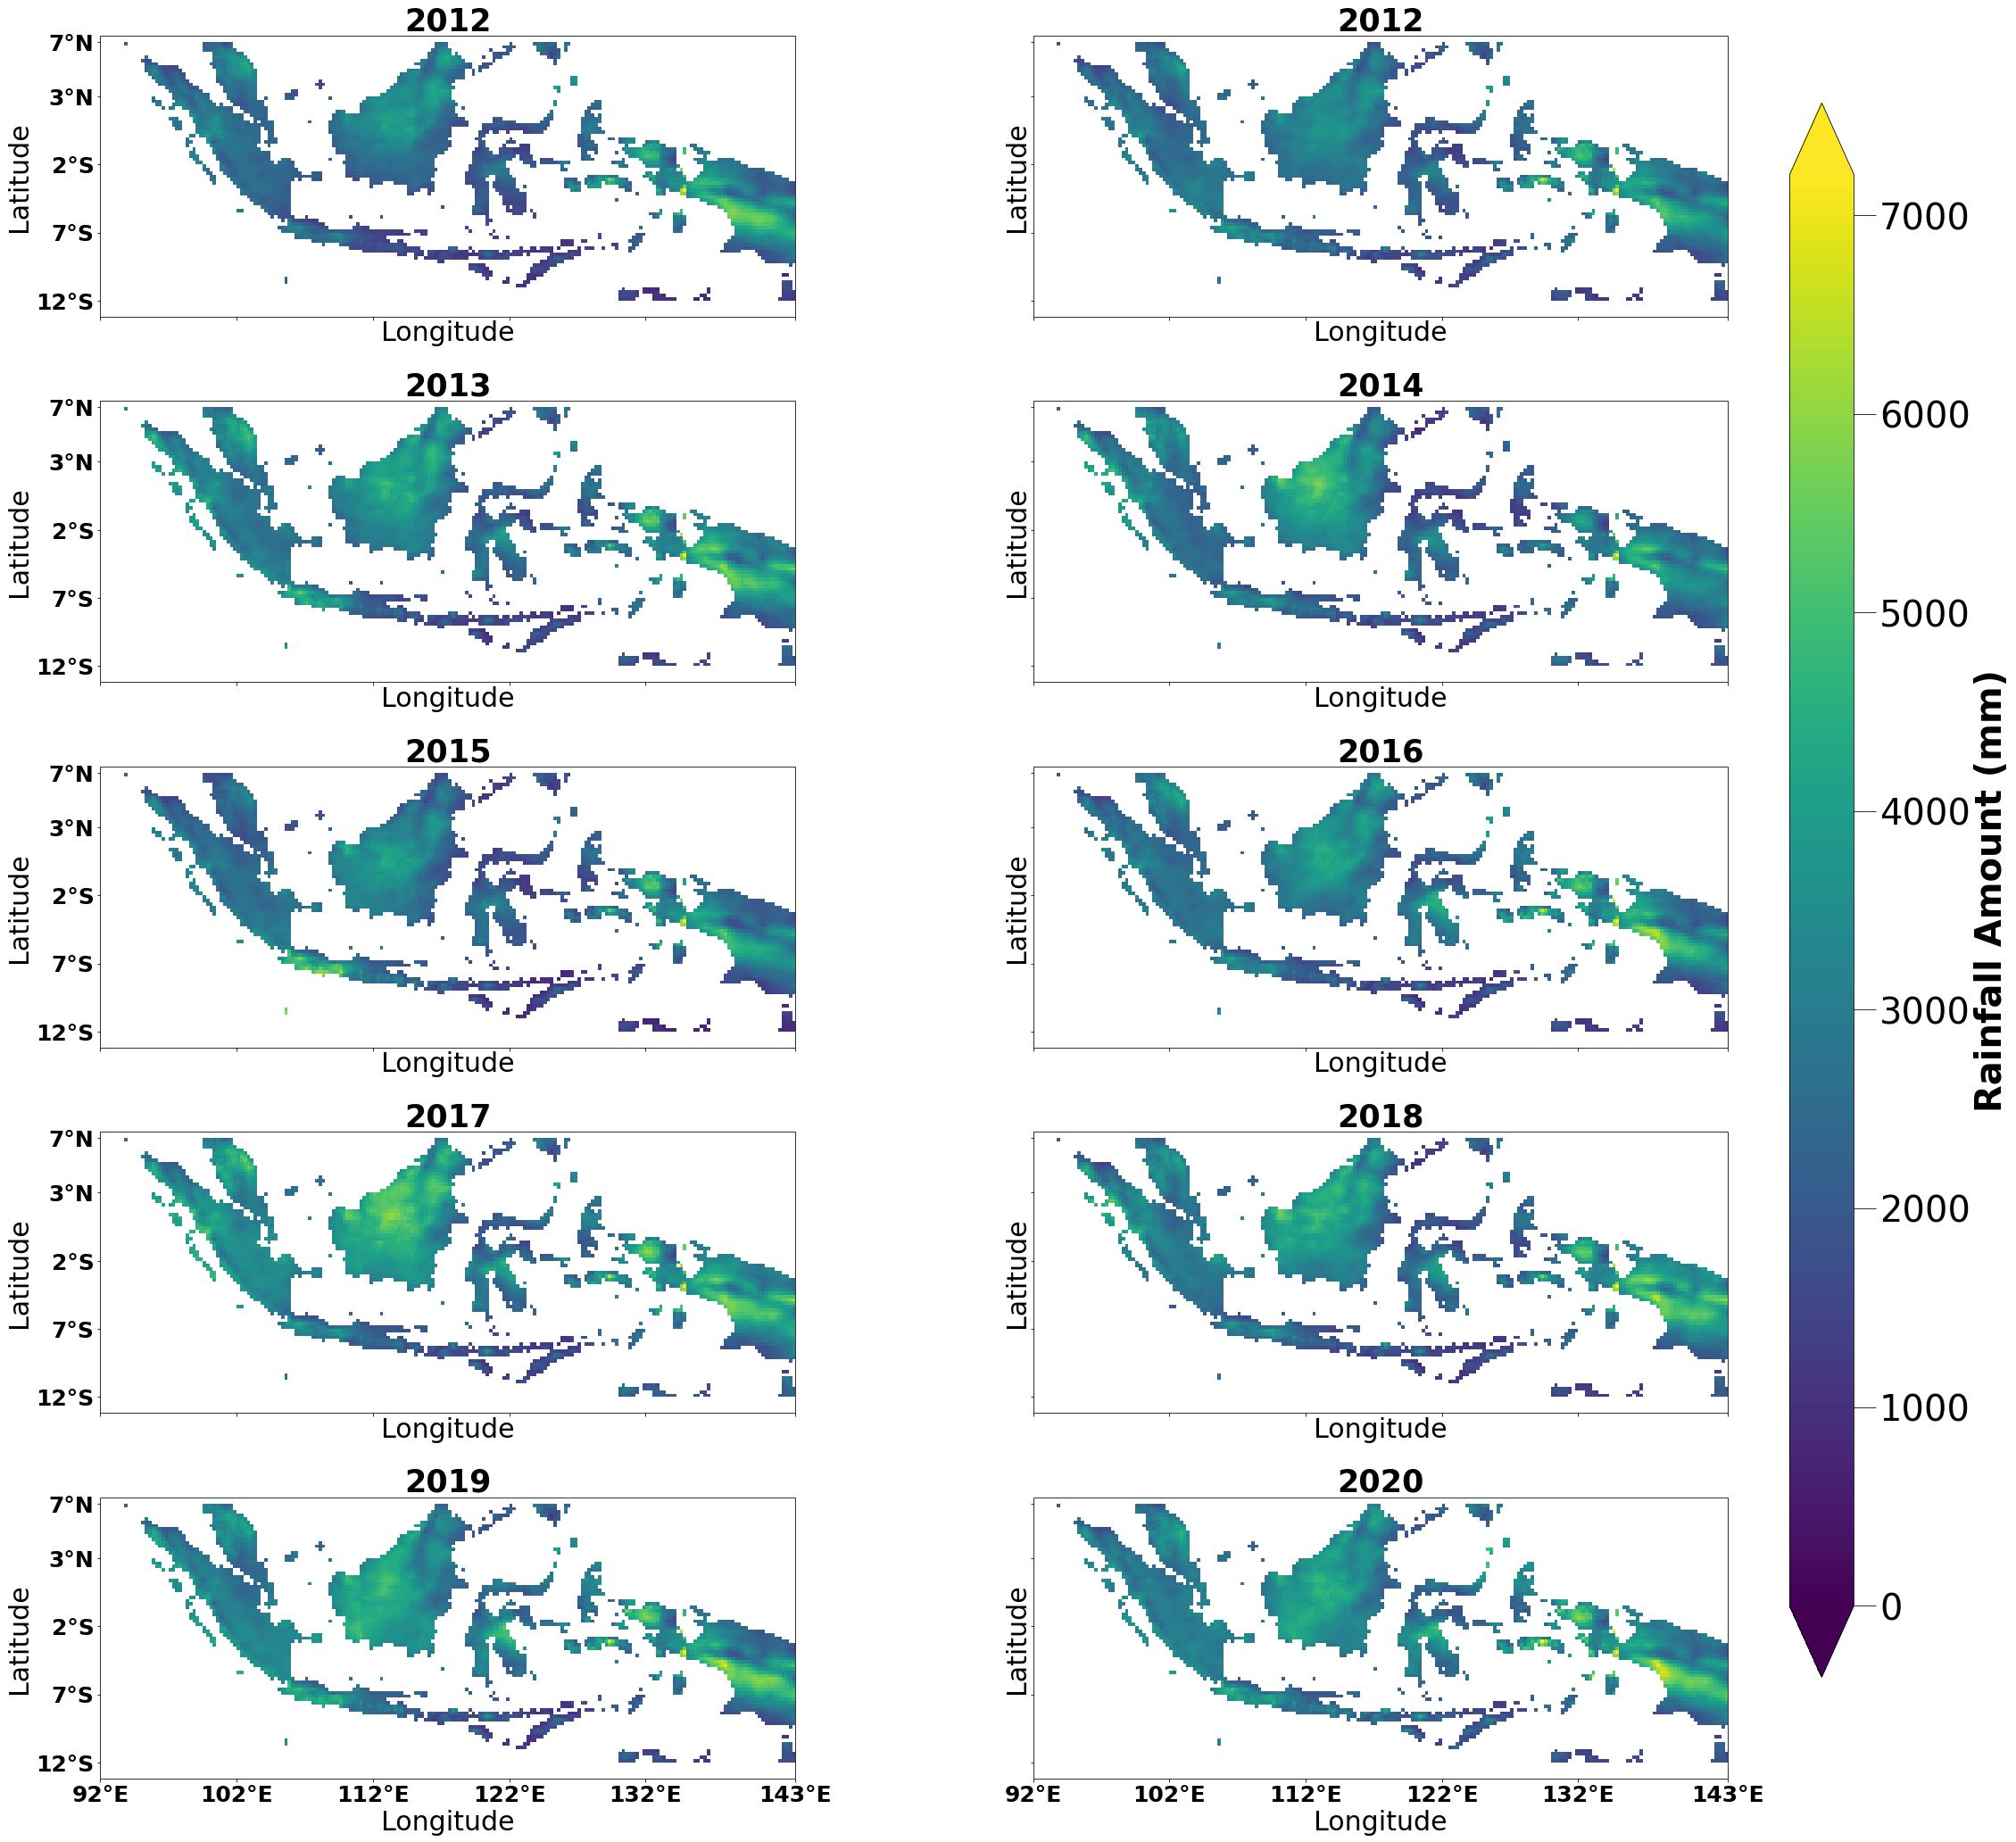

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=2, subplot_kw = dict(projection = ccrs.PlateCarree()), 
                         figsize=(50, 35), sharex = True, sharey = True)
plt.subplots_adjust(wspace= -0.3, top=0.9, right = 0.83, hspace = 0.3,)#(bottom=0.25, right=0.95, top=0.9, hspace = 0.25)

ax = axes.flatten()

Titles = ['2012','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021','2020']
xlabels = (['92', '102', '112','122', '132', '143'])
ylabels = (['-12', '-7', '-2','3', '7'])

for i, a in enumerate(ax):
    ax[i].set_extent([92,143,7,-12])
    #ax[i].add_feature(cf.BORDERS, lw = 3, color = 'r')
    #ax[i].add_feature(cf.COASTLINE, lw = 3, color = 'r')
    
    ax[i].set_xticks([92, 102, 112,122, 132, 143], crs=ccrs.PlateCarree()) 
    ax[i].set_yticks([-12, -7, -2,3, 7], crs=ccrs.PlateCarree())
    

    
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i].set_yticklabels(ylabels, fontsize = 25, fontweight = 'bold')
    ax[i].set_xticklabels(xlabels, fontsize = 25, fontweight = 'bold')
    ax[i].xaxis.set_major_formatter(lon_formatter)
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    ann_clim = ann_clim.where(ann_clim !=0)
    tp = ann_clim[i].plot(cmap='viridis', ax = ax[i], vmin = 0, add_colorbar = False)
    
    
    ax[i].set_title(Titles[i],  fontsize = 35, fontweight = 'bold')
    ax[i].set_xlabel('Longitude', fontsize = 30, )
    ax[i].set_ylabel('Latitude', fontsize = 30, )
    

cbar_ax = fig.add_axes([0.75, 0.17, 0.02, 0.7])
cbar=fig.colorbar(tp, cax=cbar_ax, orientation='vertical', extend = 'both')
cbar.set_label(label = 'Rainfall Amount (mm)',size=40, weight='bold')
cbar.ax.tick_params(size = 25, labelsize = 40)
#cbar2.set_ticks([])

plt.savefig('annual_clim_spatial.jpg')

DRY DAYS & WET DAYS
---

In [13]:
%%time

#dry days
dry_days_pm = data.where(data < 1).groupby('time.month').count('time')#.mean('time')
dry_days_py = data.where(data < 1).resample(time = '1Y').count('time')#.mean('time')

##wet days
wet_days_pm = data.where(data >= 1).groupby('time.month').count('time')#.mean('time')
wet_days_py = data.where(data >= 1).resample(time = '1Y').count('time')#.mean('time')

#extreme rainfall events
r10m = data.where(data >= 10).groupby('time.month').count('time')
r20m = data.where(data >= 20).groupby('time.month').count('time')

r10 = data.where(data >= 10).resample(time = '1Y').count('time')
r20 = data.where(data >= 20).resample(time = '1Y').count('time')

Wall time: 534 ms


# RAINY DAYS (R >> 1 & R << 1)

### per months

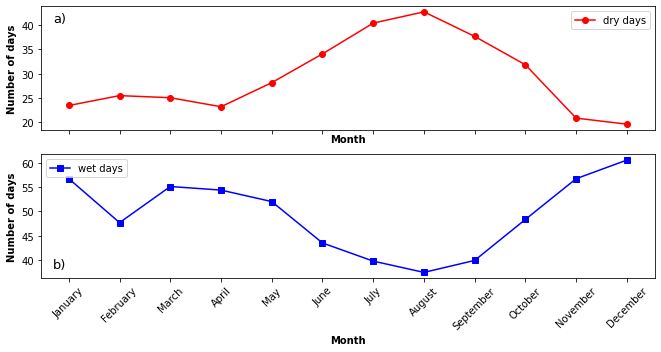

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(11,5), sharex = True)


Titles = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']

dry_days_pm.mean(['latitude', 'longitude']).plot(ax = axes[0], color = 'r', marker = 'o',label = 'dry days')
axes[0].text(0.02,0.87, 'a)', transform = axes[0].transAxes, fontsize = 13)

wet_days_pm.mean(['latitude', 'longitude']).plot(ax = axes[1], color = 'b', marker = 's', label = 'wet days')
axes[1].text(0.02,0.08, 'b)', transform = axes[1].transAxes, fontsize = 13)
axes[1].set_xticks(np.arange(1,13,1))
#ax[1].set_xticklabels(Titles[i])

#ax[0].legend()
#ax[1].legend()

ax = axes.flatten()
for i, a in enumerate(ax):
    ax[i].legend()
    ax[i].set_ylabel('Number of days', fontweight = 'bold')
    ax[i].set_xlabel('Month', fontweight = 'bold')
    ax[i].set_xticklabels(Titles, rotation = 45)
plt.savefig('R1MM_MON.jpg')

### per Years


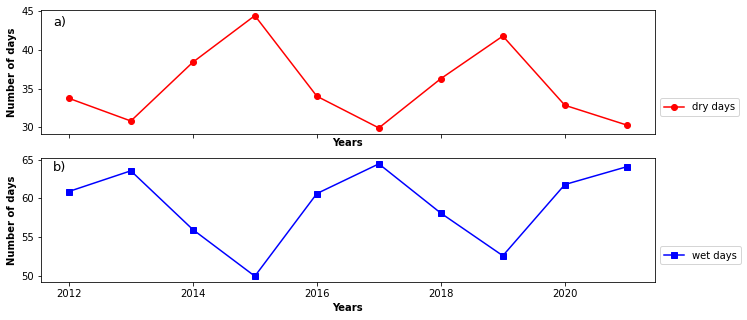

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(11,5), sharex = True)

x = np.arange(2012,2022,1)
Titles = ['2012','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021','2020']

axes[0].plot(x, dry_days_py.mean(['latitude', 'longitude']).values, color = 'r', marker = 'o',label = 'dry days')
axes[0].text(0.02,0.87, 'a)', transform = axes[0].transAxes, fontsize = 13)

axes[1].plot(x, wet_days_py.mean(['latitude', 'longitude']).values, color = 'b', marker = 's', label = 'wet days')
axes[1].text(0.02,0.9, 'b)', transform = axes[1].transAxes, fontsize = 13)



ax = axes.flatten()
for i, a in enumerate(ax):
    ax[i].legend(loc= 'lower left', ncol=1, bbox_to_anchor=(1, 0.1))
    ax[i].set_ylabel('Number of days', fontweight = 'bold')
    ax[i].set_xlabel('Years', fontweight = 'bold')
plt.savefig('R1MM_yearly.jpg')

EXTREME EVENTS
=

### R10 & R20 PER MONTHS

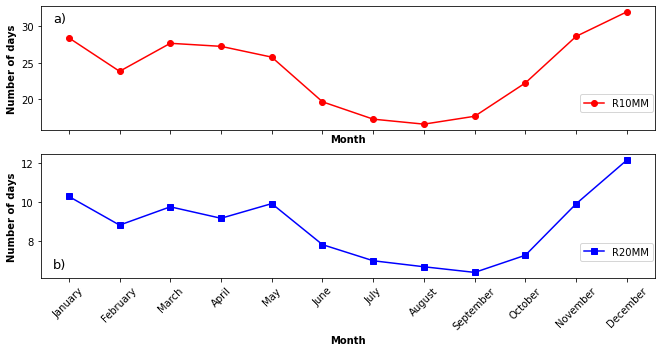

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(11,5), sharex = True)


Titles = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']

r10m.mean(['latitude', 'longitude',]).plot(ax = axes[0], color = 'r', marker = 'o',label = 'R10MM')
axes[0].text(0.02,0.87, 'a)', transform = axes[0].transAxes, fontsize = 13)

r20m.mean(['latitude', 'longitude',]).plot(ax = axes[1], color = 'b', marker = 's', label = 'R20MM')
axes[1].text(0.02,0.08, 'b)', transform = axes[1].transAxes, fontsize = 13)
axes[1].set_xticks(np.arange(1,13,1))


ax = axes.flatten()
for i, a in enumerate(ax):
    ax[i].legend(loc= 'lower left', ncol=1, bbox_to_anchor=(0.87, 0.1))
    ax[i].set_ylabel('Number of days', fontweight = 'bold')
    ax[i].set_xlabel('Month', fontweight = 'bold')
    ax[i].set_xticklabels(Titles, rotation = 45)
plt.savefig('R10_R20_MON.jpg')

### R10 & R20 PER MONTHS YEAR

C:\Users\HP\AppData\Local\Temp/ipykernel_7320/997180669.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(Titles, rotation = 45)


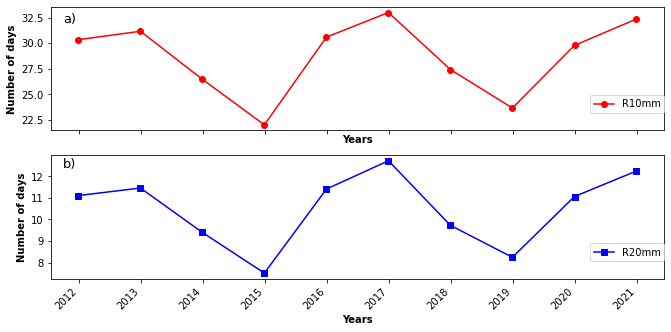

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(11,5), sharex = True)


Titles = ['2012','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021','2020']


r10.mean(['latitude', 'longitude',]).plot(ax = axes[0],  color = 'r', marker = 'o',label = 'R10mm')
axes[0].text(0.02,0.87, 'a)', transform = axes[0].transAxes, fontsize = 13)

r20.mean(['latitude', 'longitude', ]).plot(ax = axes[1], color = 'b', marker = 's', label = 'R20mm')
axes[1].text(0.02,0.9, 'b)', transform = axes[1].transAxes, fontsize = 13)

ax = axes.flatten()
for i, a in enumerate(ax):
    ax[i].legend(loc= 'lower left', ncol=1, bbox_to_anchor=(0.87, 0.1))
    ax[i].set_ylabel('Number of days', fontweight = 'bold')
    ax[i].set_xlabel('Years', fontweight = 'bold')
    ax[i].set_xticklabels(Titles, rotation = 45)
plt.savefig('R10_R20_ANN.jpg') 

### R10 MONTHLY SPATIAL PLOT 

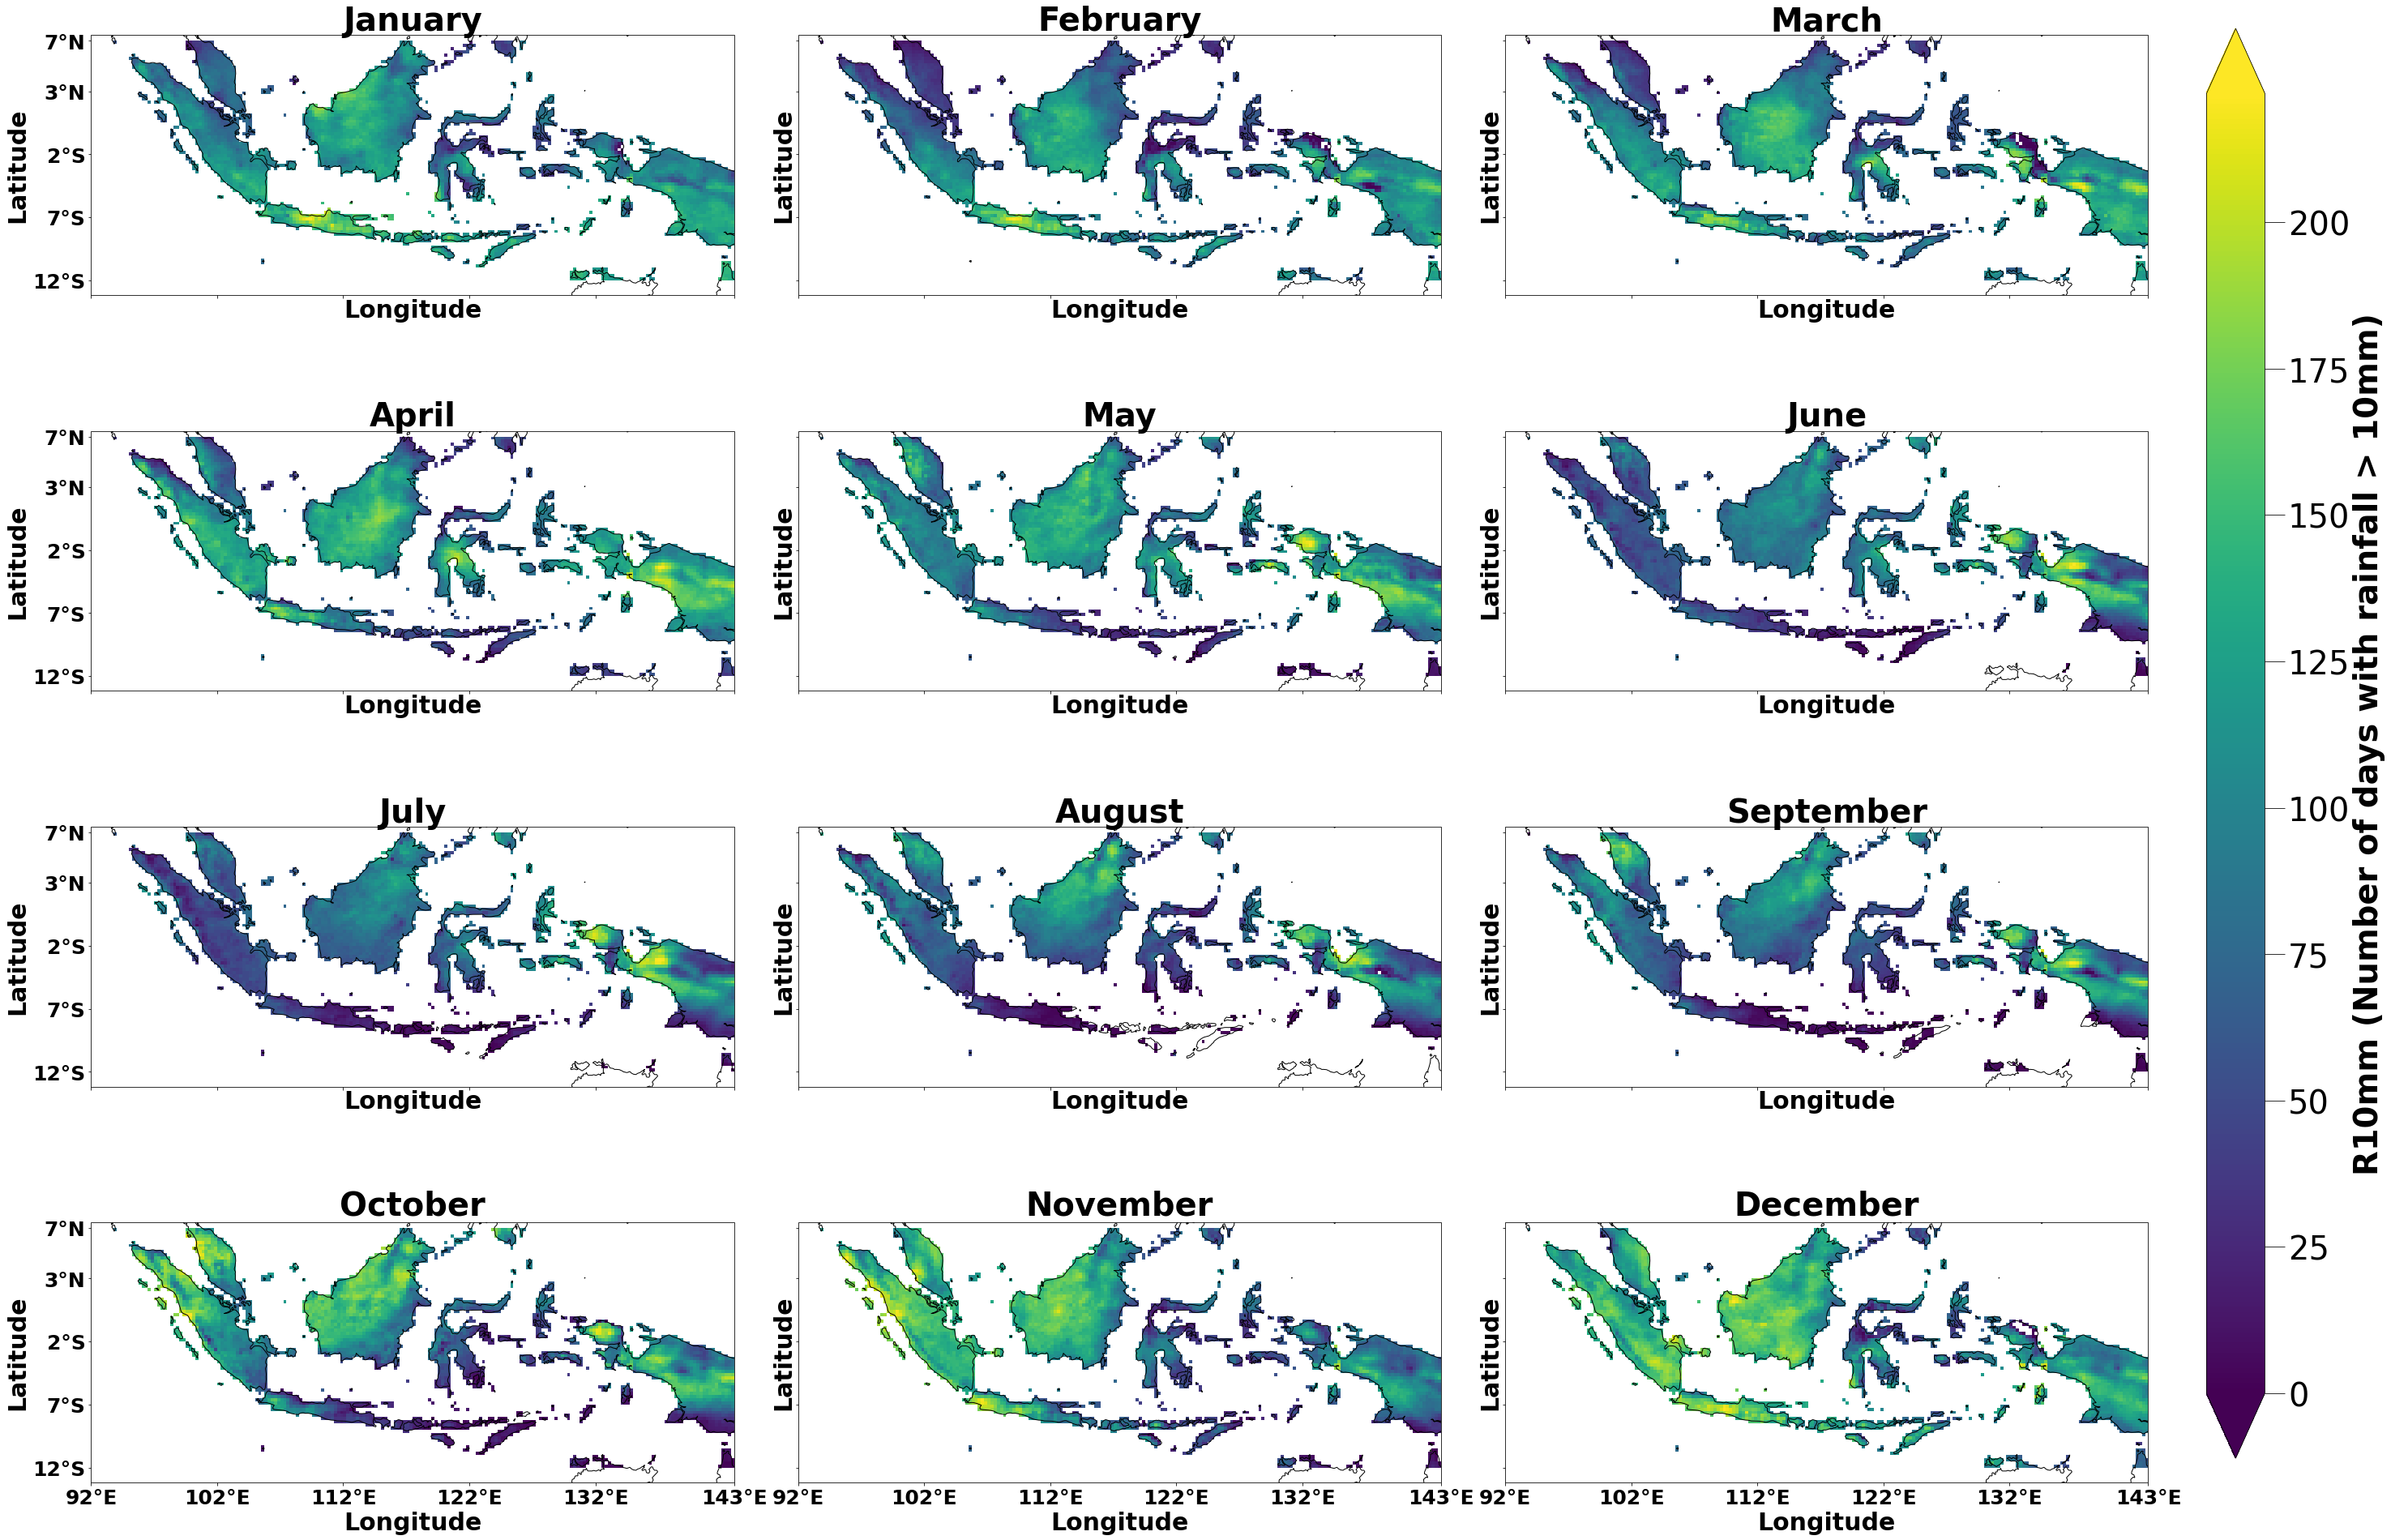

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw = dict(projection = ccrs.PlateCarree()), 
                         figsize=(50, 35), sharex = True, sharey = True)
plt.subplots_adjust(wspace= 0.1, top=0.9, right = 0.83, hspace = 0.0)#(bottom=0.25, right=0.95, top=0.9, hspace = 0.25)

ax = axes.flatten()

Titles = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
xlabels = (['92', '102', '112','122', '132', '143'])
ylabels = (['-12', '-7', '-2','3', '7'])

for i, a in enumerate(ax):
    ax[i].set_extent([92,143,7,-12])
    ax[i].add_feature(cf.COASTLINE)
    
    ax[i].set_xticks([92, 102, 112,122, 132, 143], crs=ccrs.PlateCarree()) 
    ax[i].set_yticks([-12, -7, -2,3, 7], crs=ccrs.PlateCarree())
    

    
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i].set_yticklabels(ylabels, fontsize = 25, fontweight = 'bold')
    ax[i].set_xticklabels(xlabels, fontsize = 25, fontweight = 'bold')
    ax[i].xaxis.set_major_formatter(lon_formatter)
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    r10m = r10m.where(r10m !=0)
    tp = r10m[i].plot(cmap='viridis', ax = ax[i], vmin = 0, add_colorbar = False)
    
    
    ax[i].set_title(Titles[i],  fontsize = 40, fontweight = 'bold')
    ax[i].set_xlabel('Longitude', fontsize = 30, fontweight = 'bold')
    ax[i].set_ylabel('Latitude', fontsize = 30, fontweight = 'bold')
    

cbar_ax = fig.add_axes([0.85, 0.17, 0.02, 0.7])
cbar=fig.colorbar(tp, cax=cbar_ax, orientation='vertical', extend = 'both')
cbar.set_label(label = 'R10mm (Number of days with rainfall > 10mm)',size=40, weight='bold')
cbar.ax.tick_params(size = 25, labelsize = 40)
#cbar2.set_ticks([])
plt.savefig('R10_MON_spatial.jpg')

### R20 MONTHLY SPATIAL PLOT 

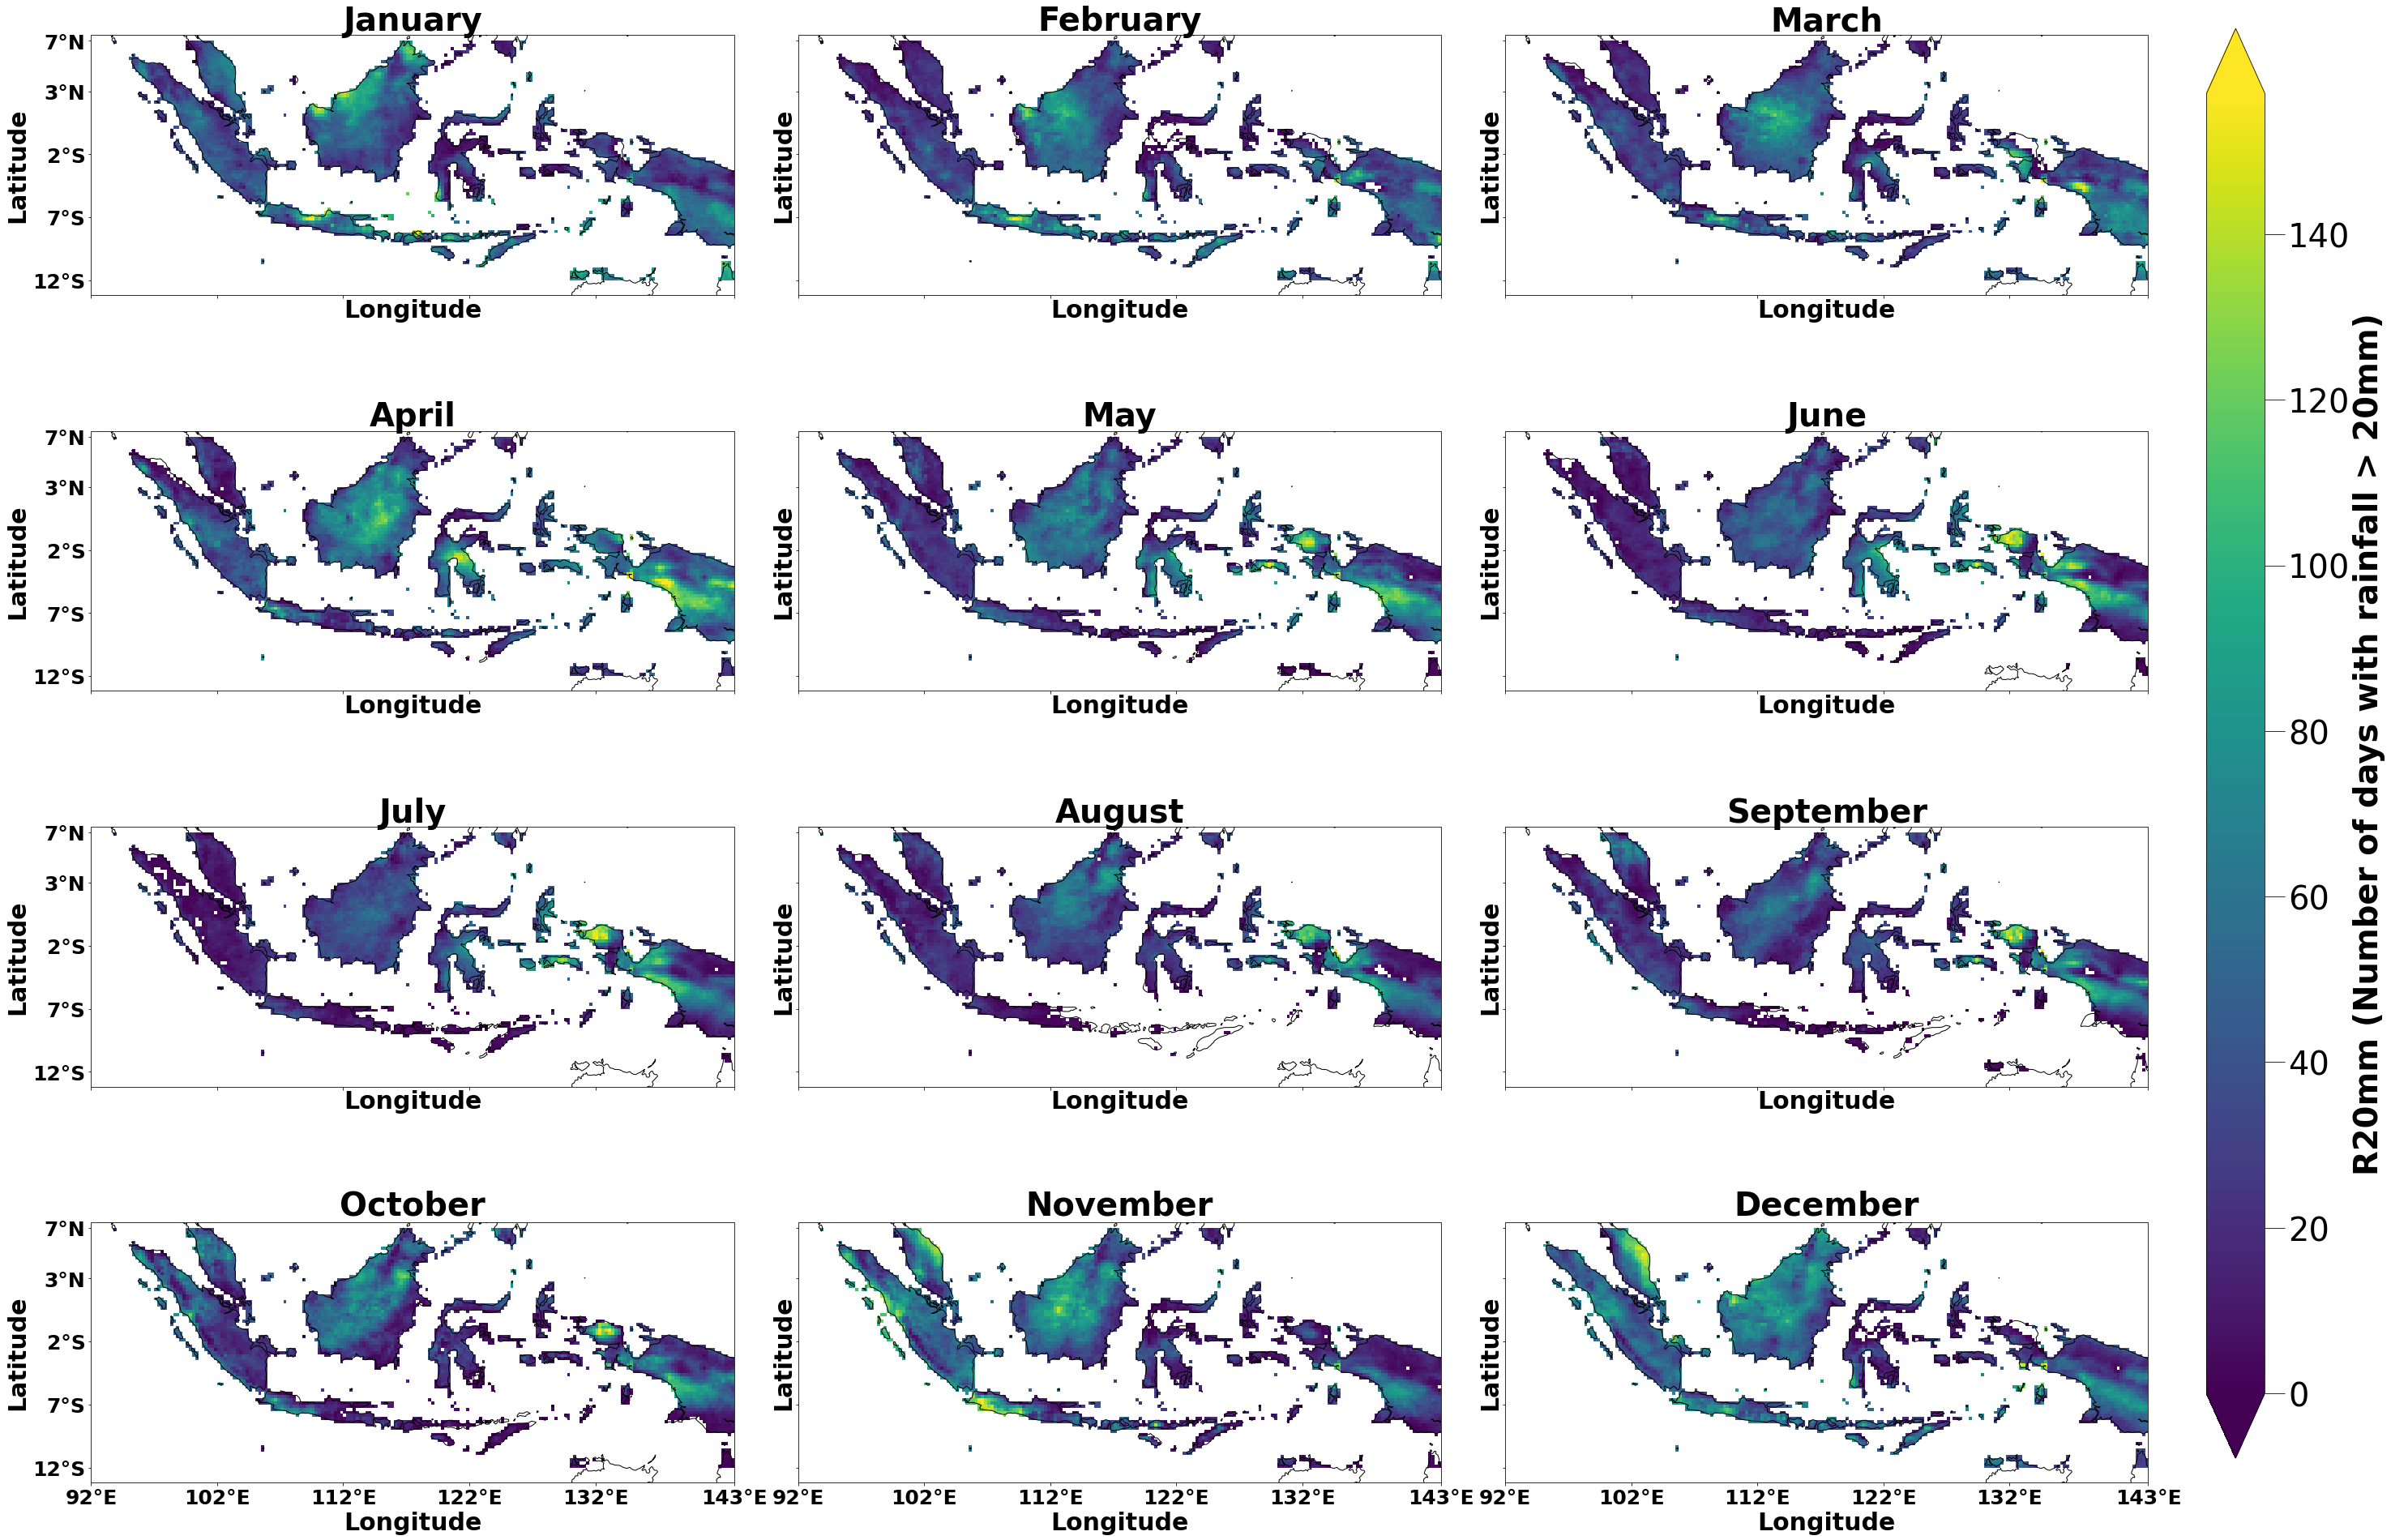

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw = dict(projection = ccrs.PlateCarree()), 
                         figsize=(50, 35), sharex = True, sharey = True)
plt.subplots_adjust(wspace= 0.1, top=0.9, right = 0.83, hspace = 0.0)#(bottom=0.25, right=0.95, top=0.9, hspace = 0.25)

ax = axes.flatten()

Titles = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
xlabels = (['92', '102', '112','122', '132', '143'])
ylabels = (['-12', '-7', '-2','3', '7'])

for i, a in enumerate(ax):
    ax[i].set_extent([92,143,7,-12])
    ax[i].add_feature(cf.COASTLINE)
    
    ax[i].set_xticks([92, 102, 112,122, 132, 143], crs=ccrs.PlateCarree()) 
    ax[i].set_yticks([-12, -7, -2,3, 7], crs=ccrs.PlateCarree())
    

    
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i].set_yticklabels(ylabels, fontsize = 25, fontweight = 'bold')
    ax[i].set_xticklabels(xlabels, fontsize = 25, fontweight = 'bold')
    ax[i].xaxis.set_major_formatter(lon_formatter)
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    r20m = r20m.where(r20m !=0)
    tp = r20m[i].plot(cmap='viridis', ax = ax[i], vmin = 0, add_colorbar = False)
    
    
    ax[i].set_title(Titles[i],  fontsize = 40, fontweight = 'bold')
    ax[i].set_xlabel('Longitude', fontsize = 30, fontweight = 'bold')
    ax[i].set_ylabel('Latitude', fontsize = 30, fontweight = 'bold')
    

cbar_ax = fig.add_axes([0.85, 0.17, 0.02, 0.7])
cbar=fig.colorbar(tp, cax=cbar_ax, orientation='vertical', extend = 'both')
cbar.set_label(label = 'R20mm (Number of days with rainfall > 20mm)',size=40, weight='bold')
cbar.ax.tick_params(size = 25, labelsize = 40)
#cbar2.set_ticks([])
plt.savefig('R20_MON_spatial.jpg')

### R10YEARLY SPATIAL PLOT 

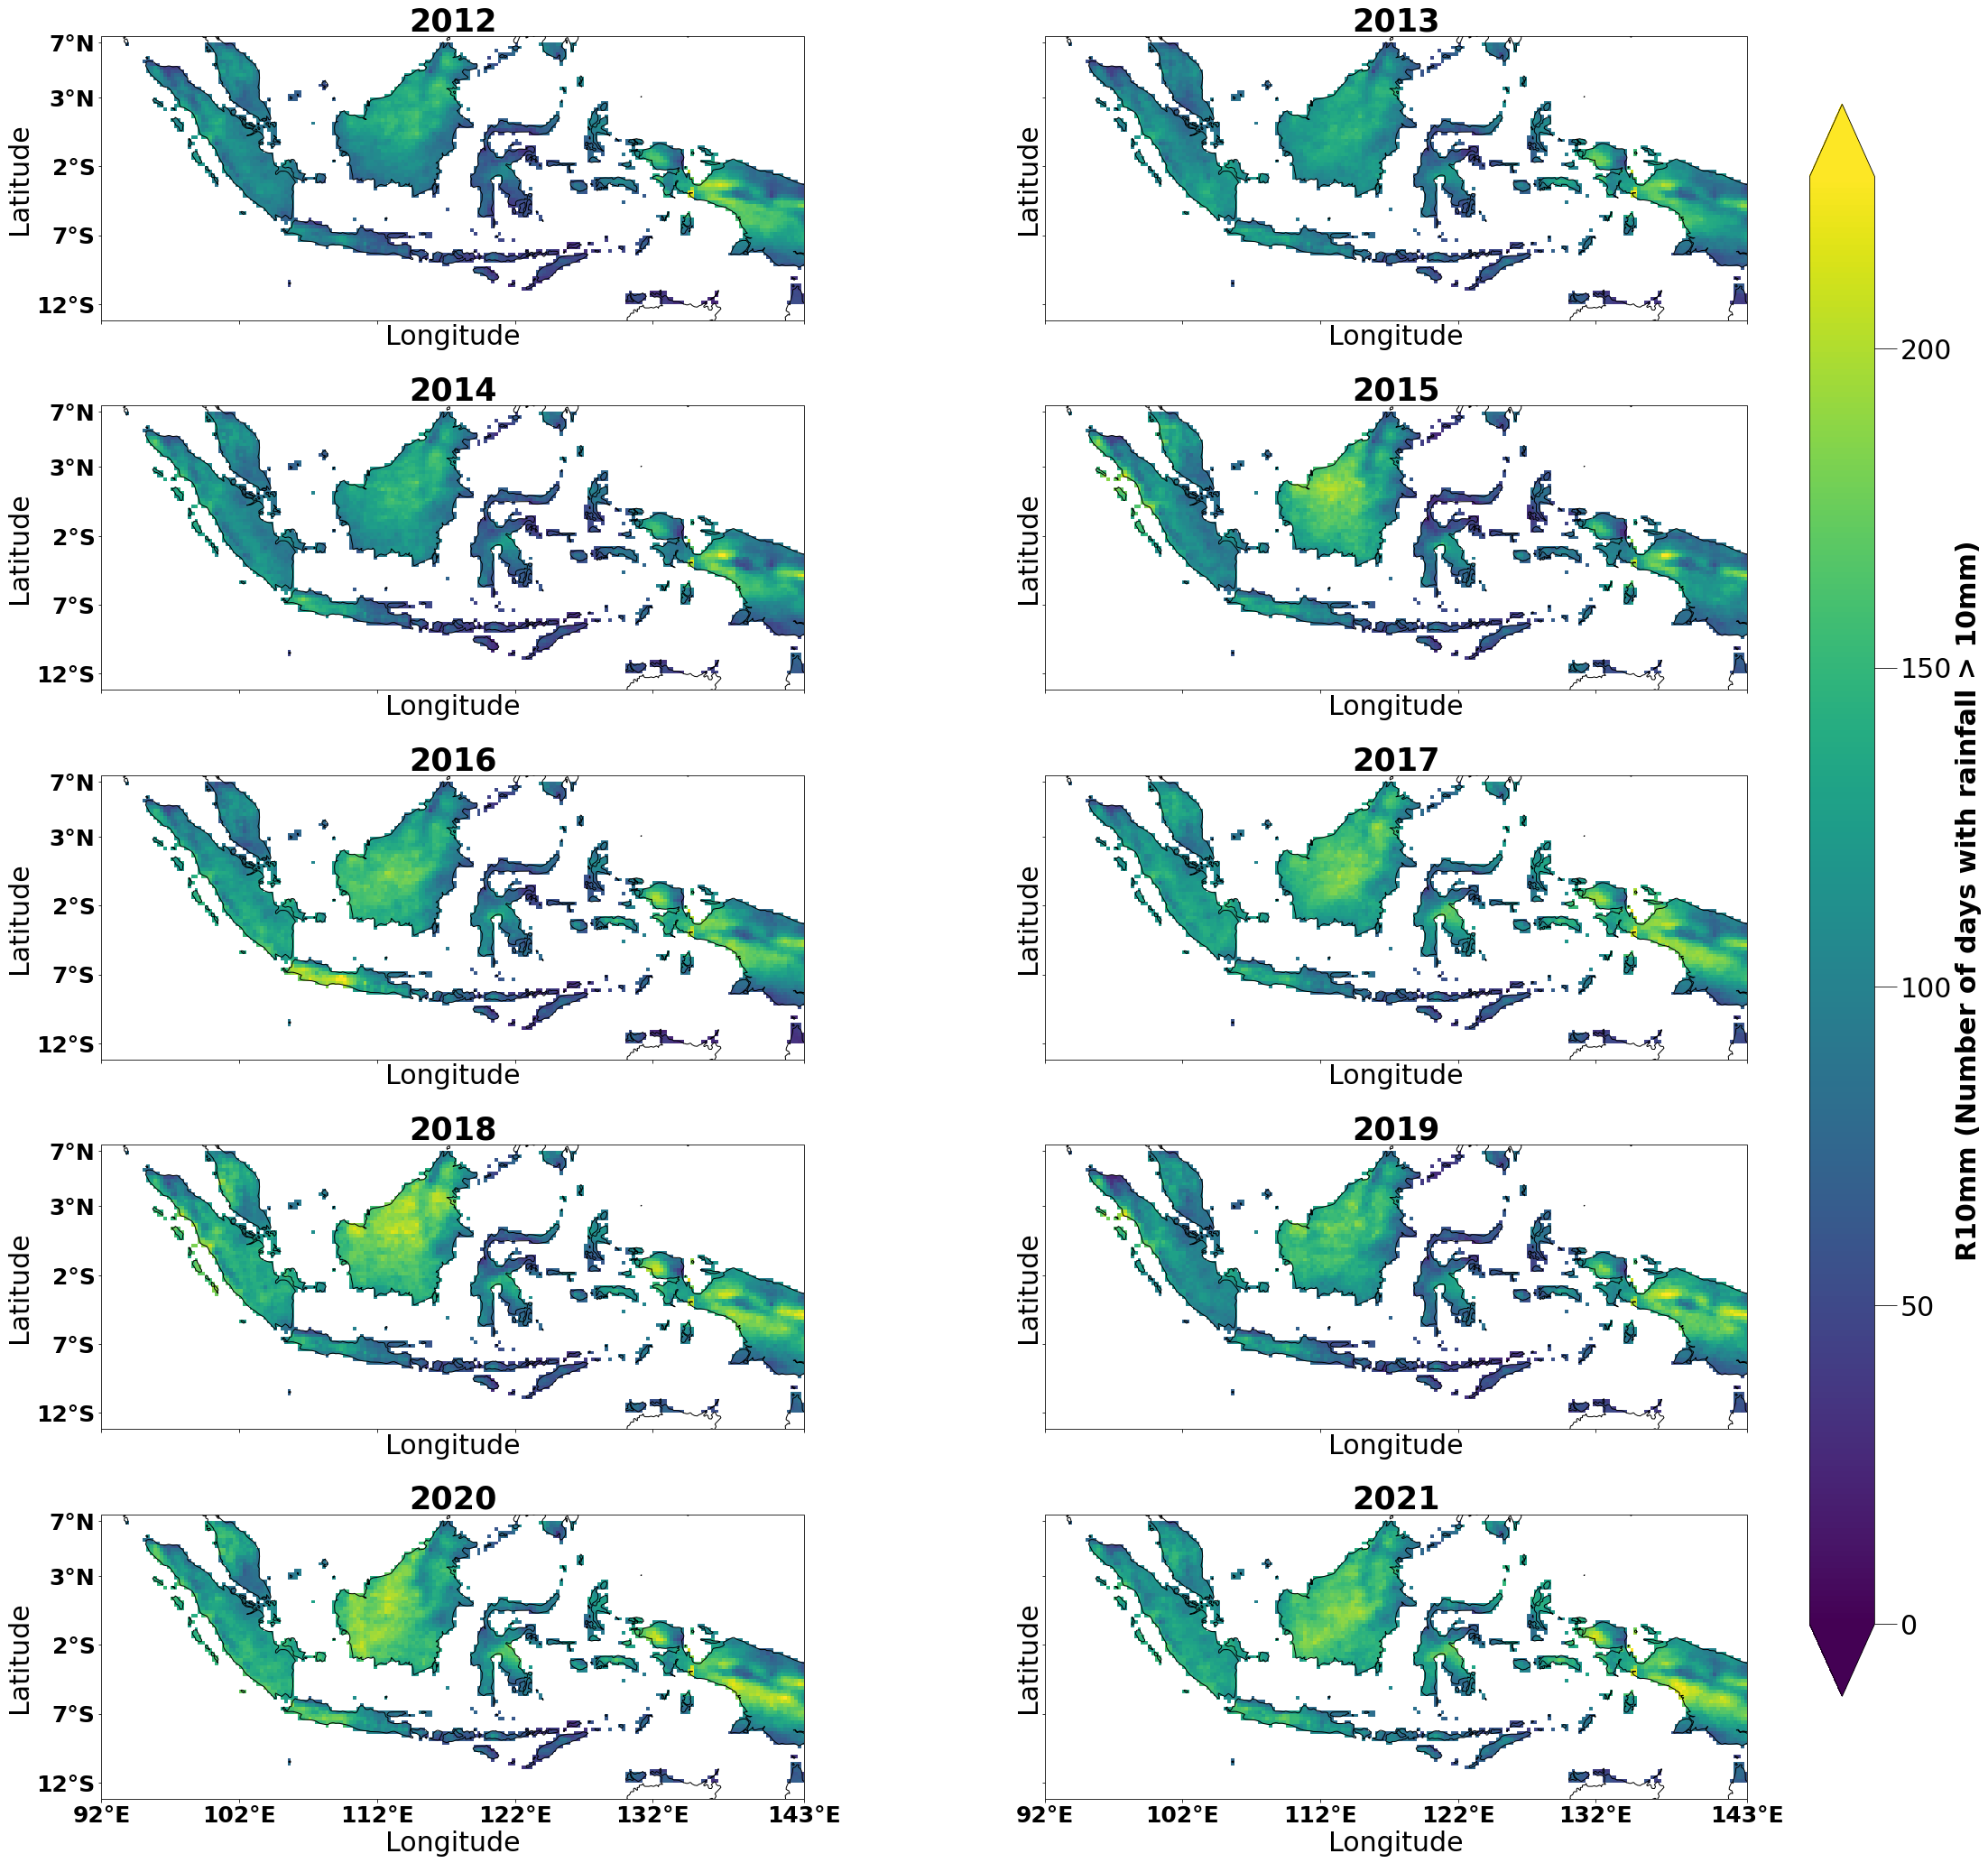

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=2, subplot_kw = dict(projection = ccrs.PlateCarree()), 
                         figsize=(50, 35), sharex = True, sharey = True)
plt.subplots_adjust(wspace= -0.3, top=0.9, right = 0.83, hspace = 0.3,)#(bottom=0.25, right=0.95, top=0.9, hspace = 0.25)

ax = axes.flatten()

Titles = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',]
xlabels = (['92', '102', '112','122', '132', '143'])
ylabels = (['-12', '-7', '-2','3', '7'])

for i, a in enumerate(ax):
    ax[i].set_extent([92,143,7,-12])
    ax[i].add_feature(cf.COASTLINE)
    #ax[i].add_feature(cf.BORDERS, lw = 3, color = 'r')
    #ax[i].add_feature(cf.COASTLINE, lw = 3, color = 'r')
    
    ax[i].set_xticks([92, 102, 112,122, 132, 143], crs=ccrs.PlateCarree()) 
    ax[i].set_yticks([-12, -7, -2,3, 7], crs=ccrs.PlateCarree())
    

    
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i].set_yticklabels(ylabels, fontsize = 25, fontweight = 'bold')
    ax[i].set_xticklabels(xlabels, fontsize = 25, fontweight = 'bold')
    ax[i].xaxis.set_major_formatter(lon_formatter)
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    r10 = r10.where(r10 !=0)
    tp = r10[i].plot(cmap='viridis', ax = ax[i], vmin = 0, add_colorbar = False)
    
    
    ax[i].set_title(Titles[i],  fontsize = 35, fontweight = 'bold')
    ax[i].set_xlabel('Longitude', fontsize = 30, )
    ax[i].set_ylabel('Latitude', fontsize = 30, )
    

cbar_ax = fig.add_axes([0.75, 0.17, 0.02, 0.7])
cbar=fig.colorbar(tp, cax=cbar_ax, orientation='vertical', extend = 'both')
cbar.set_label(label = 'R10mm (Number of days with rainfall > 10mm)',size=30, weight='bold')
cbar.ax.tick_params(size = 25, labelsize = 30)
#cbar2.set_ticks([])
plt.savefig('R10_ANN_spatial.jpg')

### R20 YEARLY SPATIAL PLOT 

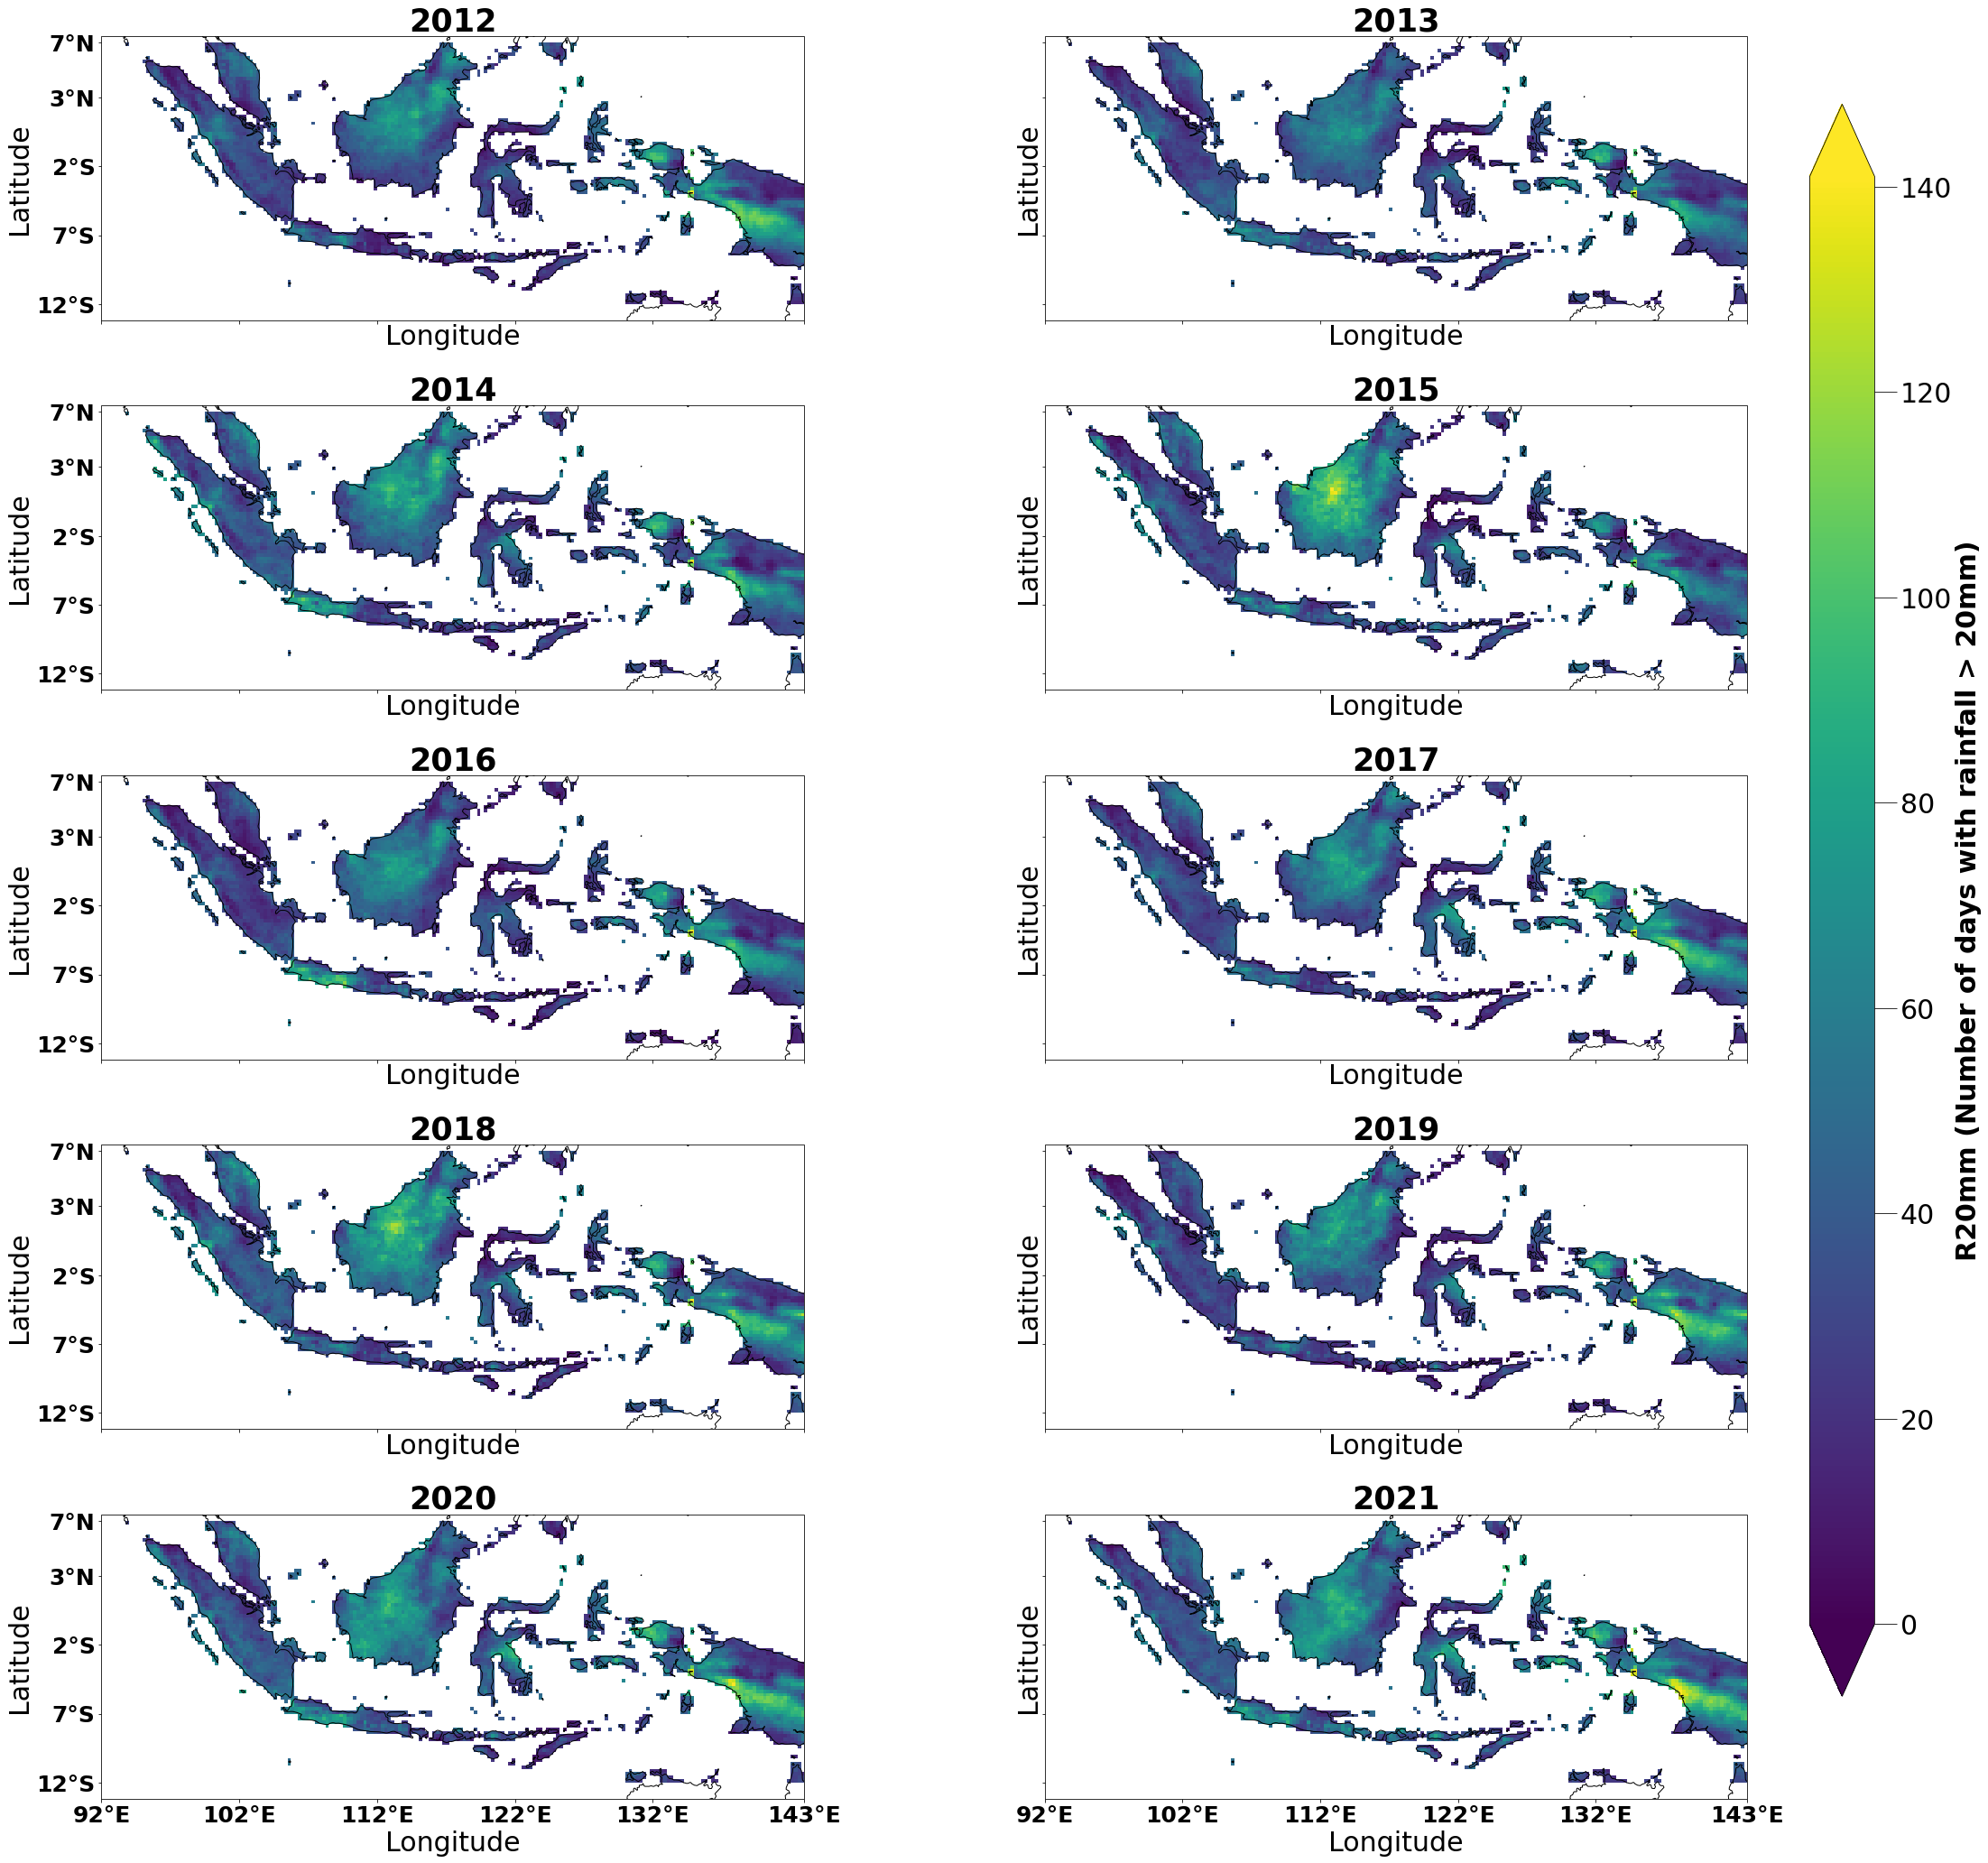

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=2, subplot_kw = dict(projection = ccrs.PlateCarree()), 
                         figsize=(50, 35), sharex = True, sharey = True)
plt.subplots_adjust(wspace= -0.3, top=0.9, right = 0.83, hspace = 0.3,)#(bottom=0.25, right=0.95, top=0.9, hspace = 0.25)

ax = axes.flatten()

Titles = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',]
xlabels = (['92', '102', '112','122', '132', '143'])
ylabels = (['-12', '-7', '-2','3', '7'])

for i, a in enumerate(ax):
    ax[i].set_extent([92,143,7,-12])
    ax[i].add_feature(cf.COASTLINE)
    #ax[i].add_feature(cf.BORDERS, lw = 3, color = 'r')
    #ax[i].add_feature(cf.COASTLINE, lw = 3, color = 'r')
    
    ax[i].set_xticks([92, 102, 112,122, 132, 143], crs=ccrs.PlateCarree()) 
    ax[i].set_yticks([-12, -7, -2,3, 7], crs=ccrs.PlateCarree())
    

    
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i].set_yticklabels(ylabels, fontsize = 25, fontweight = 'bold')
    ax[i].set_xticklabels(xlabels, fontsize = 25, fontweight = 'bold')
    ax[i].xaxis.set_major_formatter(lon_formatter)
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    r20 = r20.where(r20 !=0)
    tp = r20[i].plot(cmap='viridis', ax = ax[i], vmin = 0, add_colorbar = False)
    
    
    ax[i].set_title(Titles[i],  fontsize = 35, fontweight = 'bold')
    ax[i].set_xlabel('Longitude', fontsize = 30, )
    ax[i].set_ylabel('Latitude', fontsize = 30, )
    

cbar_ax = fig.add_axes([0.75, 0.17, 0.02, 0.7])
cbar=fig.colorbar(tp, cax=cbar_ax, orientation='vertical', extend = 'both')
cbar.set_label(label = 'R20mm (Number of days with rainfall > 20mm)',size=30, weight='bold')
cbar.ax.tick_params(size = 25, labelsize = 30)
#cbar2.set_ticks([])
plt.savefig('R20_ANN_spatial.jpg')